# ดาวน์โหลด Dataset

Dataset : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/heart.csv")

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
haveDisease = len(df[df.target == 1])
dontHaveDisease = len(df[df.target == 0])

print("{:.2f}% of patients have Heart Disease.".format((haveDisease / (len(df.target)) * 100)))
print("{:.2f}% of patients don't have Heart Disease.".format((dontHaveDisease / (len(df.target)) * 100)))

51.32% of patients have Heart Disease.
48.68% of patients don't have Heart Disease.


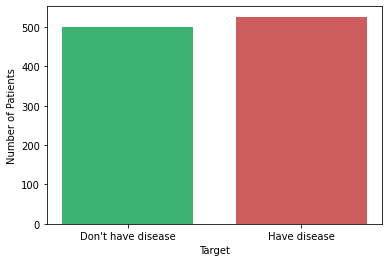

In [ ]:
label = ["Don't have disease", "Have disease"]
value = (dontHaveDisease, haveDisease)

plt.subplots(figsize=(6,4))
plt.bar(label, value, width=0.75, color=['mediumseagreen', 'indianred'])
plt.ylabel("Number of Patients")
plt.xlabel("Target")
plt.show()

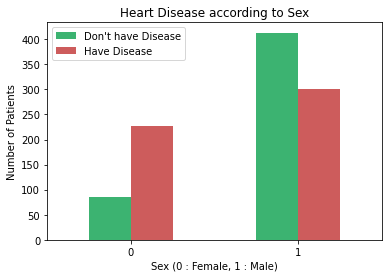

In [ ]:
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(6,4), color=['#3cb371', '#cd5c5c'])
plt.title('Heart Disease according to Sex')
plt.ylabel('Number of Patients')
plt.xlabel('Sex (0 : Female, 1 : Male)')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()

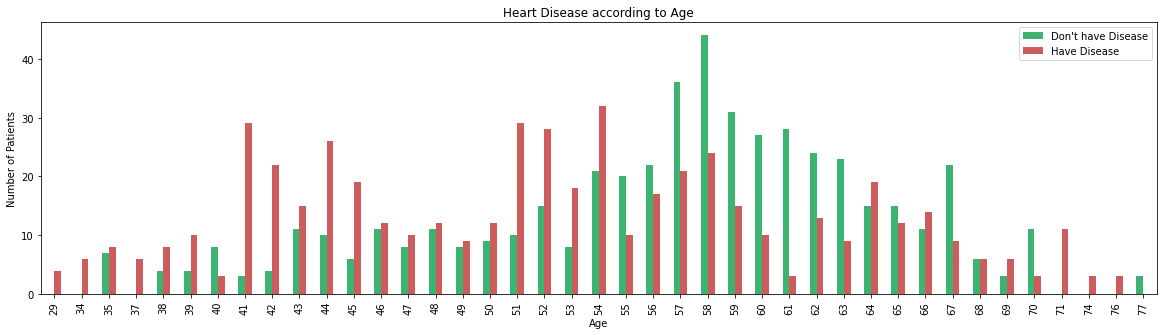

In [ ]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20,5), color=['#3cb371', '#cd5c5c'])
plt.title('Heart Disease according to Age')
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

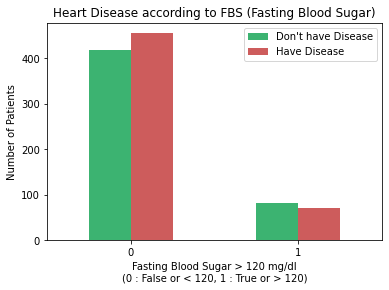

In [ ]:
pd.crosstab(df.fbs, df.target).plot(kind="bar", figsize=(6,4), color=['#3cb371', '#cd5c5c'])
plt.title('Heart Disease according to FBS (Fasting Blood Sugar)')
plt.ylabel('Number of Patients')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl\n(0 : False or < 120, 1 : True or > 120)')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()

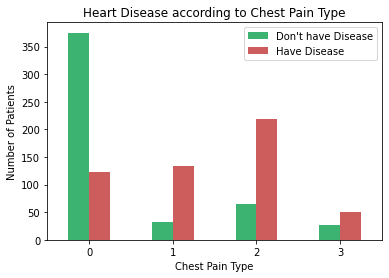

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(6,4), color=['#3cb371', '#cd5c5c'])
plt.title('Heart Disease according to Chest Pain Type')
plt.ylabel('Number of Patients')
plt.xlabel('Chest Pain Type')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation = 0)
plt.show()

#Data Preprocessing

In [ ]:
cp = pd.get_dummies(df['cp'], prefix="cp")
thal = pd.get_dummies(df['thal'], prefix="thal")
slope = pd.get_dummies(df['slope'], prefix="slope")

In [ ]:
df_ = [df, cp, thal, slope]
df = pd.concat(df_, axis=1)
df = df.drop(columns=['cp', 'thal', 'slope'])
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,1,164,1,0.0,0,...,1,0,0,0,0,1,0,0,0,1
1021,60,1,125,258,0,0,141,1,2.8,1,...,0,0,0,0,0,0,1,0,1,0
1022,47,1,110,275,0,0,118,1,1.0,1,...,0,0,0,0,0,1,0,0,1,0
1023,50,0,110,254,0,0,159,0,0.0,0,...,0,0,0,0,0,1,0,0,0,1


# แบ่งชุดข้อมูล

In [ ]:
X = df.drop(['target'], axis = 1)
y = df.target.values

# Data Transformation (Feature Extraction)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, random_state=0)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print('Original shape : {}'.format(str(X_scaled.shape)))
print('Reduced shape : {}'.format(str(X_pca.shape)))

Original shape : (1025, 21)
Reduced shape : (1025, 14)


# แบ่ง Training set และ Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(768, 14) (257, 14) (768,) (257,)


# K-Nearest Neightbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("k-NN train score : {:.4f}".format(knn.score(X_train, y_train)))
print("k-NN test score : {:.4f}".format(knn.score(X_test, y_test)))

k-NN train score : 0.8880
k-NN test score : 0.8716


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', C=1, random_state=0).fit(X_train,y_train)

print("Logistic Regression train score : {:.4f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression test score : {:.4f}".format(logreg.score(X_test, y_test)))

Logistic Regression train score : 0.8464
Logistic Regression test score : 0.8521


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=0).fit(X_train, y_train)

print("SVM train score : {:.4f}".format(svm.score(X_train, y_train)))
print("SVM test score : {:.4f}".format(svm.score(X_test, y_test)))

SVM train score : 0.9206
SVM test score : 0.9300


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train, y_train)

print("Naive Bayes train score : {:.4f}".format(nb.score(X_train, y_train)))
print("Naive Bayes test score : {:.4f}".format(nb.score(X_test, y_test)))

Naive Bayes train score : 0.8372
Naive Bayes test score : 0.8521


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("Decision Tree train score : {:.4f}".format(tree.score(X_train, y_train)))
print("Decision Tree test score : {:.4f}".format(tree.score(X_test, y_test)))

Decision Tree train score : 0.9922
Decision Tree test score : 0.9844


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=4, random_state = 0)
forest.fit(X_train, y_train)

print("Random Forest train score : {:.4f}".format(forest.score(X_train, y_train)))
print("Random Forest test score : {:.4f}".format(forest.score(X_test, y_test)))

Random Forest train score : 0.9987
Random Forest test score : 0.9922


# เปรียบเทียบ Accuracy

In [ ]:
print("k-NN test score : {:.4f}".format(knn.score(X_test, y_test)))
print("Logistic Regression test score : {:.4f}".format(logreg.score(X_test, y_test)))
print("SVM test score : {:.4f}".format(svm.score(X_test, y_test)))
print("Naive Bayes test score : {:.4f}".format(nb.score(X_test,y_test)))
print("Decision Tree test score {:.4f}".format(tree.score(X_test, y_test)))
print("Random Forest test score : {:.4f}".format(forest.score(X_test, y_test)))

k-NN test score : 0.8716
Logistic Regression test score : 0.8521
SVM test score : 0.9300
Naive Bayes test score : 0.8521
Decision Tree test score 0.9844
Random Forest test score : 0.9922


# Confusion Matrix

In [ ]:
pred_knn = knn.predict(X_test)
pred_logreg = logreg.predict(X_test)
pred_svm = svm.predict(X_test)
pred_nb = nb.predict(X_test)
pred_tree = tree.predict(X_test)
pred_forest = forest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, pred_knn)
cm_logreg = confusion_matrix(y_test, pred_logreg)
cm_svm = confusion_matrix(y_test, pred_svm)
cm_nb = confusion_matrix(y_test, pred_nb)
cm_tree = confusion_matrix(y_test, pred_tree)
cm_forest = confusion_matrix(y_test, pred_forest)

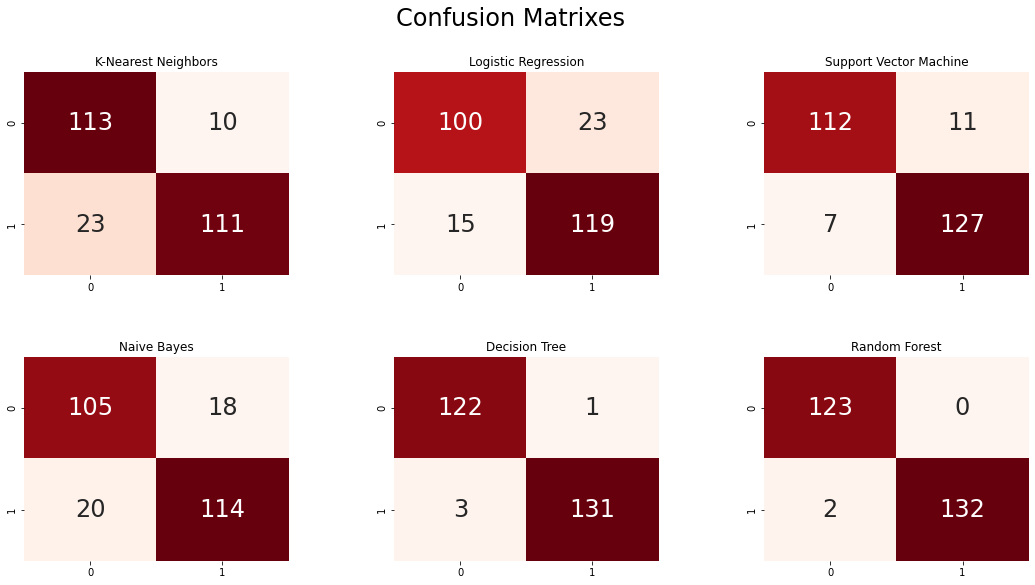

In [ ]:
plt.figure(figsize=(18,9))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2,3,1)
plt.title("K-Nearest Neighbors")
sns.heatmap(cm_knn, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression")
sns.heatmap(cm_logreg, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine")
sns.heatmap(cm_svm, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes")
sns.heatmap(cm_nb, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree")
sns.heatmap(cm_tree, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest")
sns.heatmap(cm_forest, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

## ค่า Precision, Recall และ F1-Score

In [ ]:
from sklearn.metrics import classification_report

print("k-NN")
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_knn, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------\n\nLogistic Regression')
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_logreg, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------\n\nSVM')
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_svm, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------\n\nNaive Bayes')
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_nb, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------\n\nDecision Tree')
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_tree, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------\n\nRandom Forest')
print('------------------------------------------------------------------')
print(classification_report(y_test, pred_forest, target_names=["Have Disease", "Don't have Disease"]))
print('------------------------------------------------------------------')

k-NN
------------------------------------------------------------------
                    precision    recall  f1-score   support

      Have Disease       0.83      0.92      0.87       123
Don't have Disease       0.92      0.83      0.87       134

          accuracy                           0.87       257
         macro avg       0.87      0.87      0.87       257
      weighted avg       0.88      0.87      0.87       257

------------------------------------------------------------------

Logistic Regression
------------------------------------------------------------------
                    precision    recall  f1-score   support

      Have Disease       0.87      0.81      0.84       123
Don't have Disease       0.84      0.89      0.86       134

          accuracy                           0.85       257
         macro avg       0.85      0.85      0.85       257
      weighted avg       0.85      0.85      0.85       257

-----------------------------------------------